<center><font size="+4">Programming & Data Analytics & AI 2 2022/2023</font></center>
<center><font size="+2">Module 2</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20202021/raw/main/IPDP/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="The extensible parallel architecture of MultiVeStA"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer (informally)</font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Part 2</font></center>
<center><font size="+4">Lecture 4: Breast Cancer Diagnosis 2</font></center>
<center><font size="+4">Unsupervised learning</font></center>

---

> __This notebook has been created by Dr Daniele Licari for previous editions of this course, and then further elaborated by Andrea Vandin__
> - __I thank Daniele for the great job in preparing the material__
> - __I also thank Daniele for collaborating on the design of PDAI 1 and 2 since their first editions/incarnations__

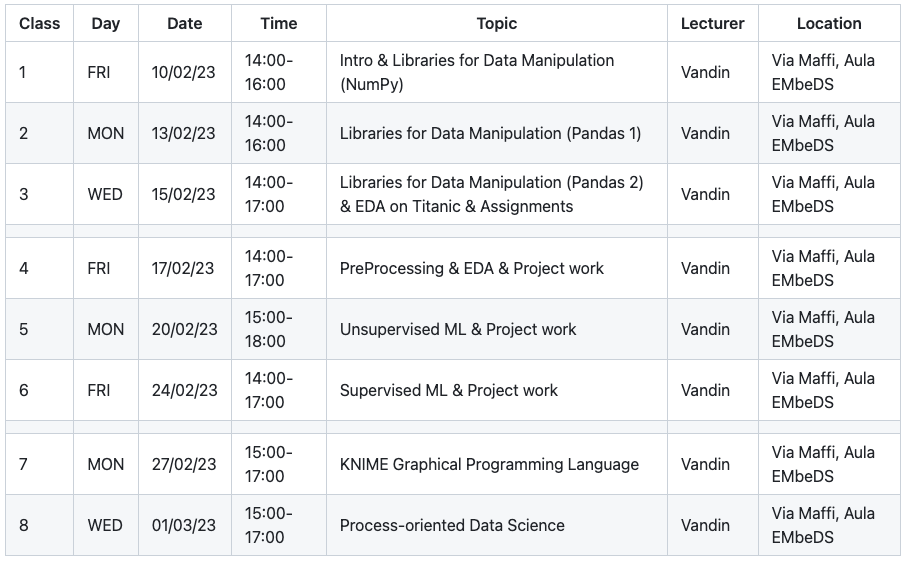

In [1]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/StatsAndComputing20222023/raw/main/PDAI/"
url_images=url_github_repo+'jupyter/jupyterNotebooks/images/'
img=Image(url_github_repo+'slides/figures/calendarPDAI2.png',width=800)
display(img)

**This notebook provides an an introduction to the unsupervised learning pipeline**
   * Dimensionality Reduction
   * Clustering Analysis

You can find more details in the [APPENDIX](#APPENDIX) of this document.

In particular, in this notebook we will keep on using the libraries:

   * [scikit-learn](https://scikit-learn.org/stable/): simple and efficient tools for predictive data analysis 
   * [Seaborn](http://seaborn.pydata.org/):  data visualization library based on matplotlib. A high-level interface for drawing attractive and informative statistical graphics.

**References** 

Some in-depth study material:

* <mark> [Statistics and Machine Learning in Python, E.Duchesnay, T.Löfstedt, F.Younes](https://duchesnay.github.io/pystatsml)</mark>
* <mark> [Statistical Learning & Large Data, Francesca Chiaromonte](https://github.com/EMbeDS-education/StatsAndComputing20222023/wiki/SLLD)</mark>
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-data-science/9781491912126/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks)
* [Introduction to Data Mining (2nd Edition), Pang-Ning Tan et al.](https://www.cse.msu.edu/~ptan/)
* [Introduction to Machine Learning Algorithms, KNIME AG](https://www.knime.com/knime-course-material-download-page)

Some pictures have been taken from these sources.

# Benign and Malignant Breast Cancer Case Study 
We will analize Wisconsin Breast Cancer Dataset (WBCD), features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

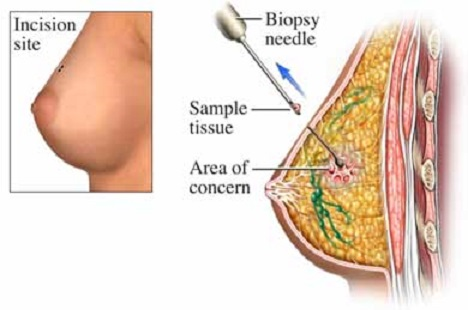

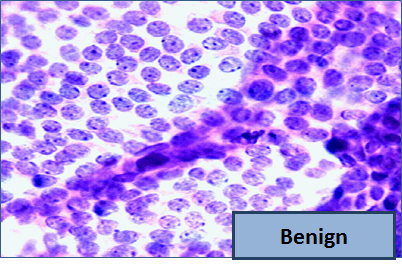

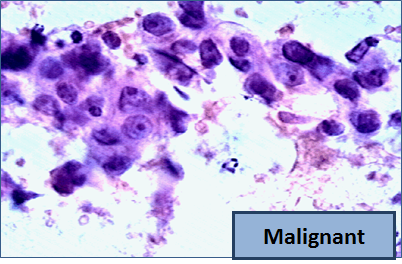

In [2]:
img=Image(url_images+'Breast-Biopsy-2.jpg')
display(img)

display(Image(url_images+'fna-benign1.png'))

display(Image(url_images+'fna-malignant1.png'))

**Attribute Information**
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

**Labels Class:**
* malignant
* benign



This dataset is also available via the ftp server UW CS: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

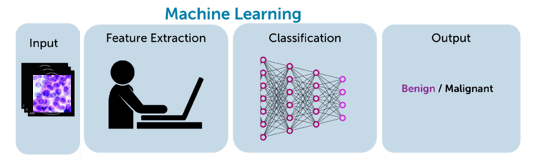

In [3]:
display(Image(url_images+'machine_learning_cancer.png'))

## Load libraries

In [4]:
# Data Processing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizzation libs
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
from IPython.display import display, Markdown # display Markdown code using Python
import seaborn as sns # data visualization library based on matplotlib

from warnings import filterwarnings
filterwarnings('ignore')

#Note necessary anymore. But can be done if interested
# # download the all repository if you are on COLAB
# import os
# import sys
# IN_COLAB = 'google.colab' in sys.modules
# course_name = 'StatsAndComputing20222023' 

# if IN_COLAB: 
#     !git clone https://github.com/EMbeDS-education/{course_name}.git
#     os.chdir(f'/content/{course_name}/PDAI/jupyter/jupyterNotebooks') #for SSSA
#     # os.chdir(f'/content/{course_name}/jupyter/jupyterNotebooks')

## Load data
Let's load the preprocessed data from previous class and get 
- *Features matrix* $X$ and 
- *Target array* $Y$

Remember: in the preprocessing analysis we have:
- dropped 12 extreme outliers
- dropped all `radius` and `perimemter` columns as the are highly correlated with the corresponding `area` ones

We are left with
- 557 observations/rows
- 24 columns
  - 23 features
  - 1 target (`target`)

Let us load dataset preprocessed in the previous class

In [8]:
#load dataset, we will first load the data into a Pandas DataFrame object and display its content

#If you generated the file yourself during previous class
data = pd.read_csv('data/WBCD_preprocessed.csv')
#If you prefer to use the one generated by the professor during the class
#data = pd.read_csv(url_github_repo+'jupyter/jupyterNotebooks/data/WBCD_preprocessed.csv')

print(data.shape)
data.info()

(557, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean texture             557 non-null    float64
 1   mean area                557 non-null    float64
 2   mean smoothness          557 non-null    float64
 3   mean compactness         557 non-null    float64
 4   mean concavity           557 non-null    float64
 5   mean concave points      557 non-null    float64
 6   mean symmetry            557 non-null    float64
 7   mean fractal dimension   557 non-null    float64
 8   texture error            557 non-null    float64
 9   area error               557 non-null    float64
 10  smoothness error         557 non-null    float64
 11  compactness error        557 non-null    float64
 12  concavity error          557 non-null    float64
 13  concave points error     557 non-null    float64
 14  symmetry error  

In [9]:
data.head()

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,153.40,...,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant
4,15.70,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.8902,27.19,...,0.02165,0.005082,23.75,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,malignant


Do we have any missing value!?

In [10]:
data[data.isnull().any(axis=1)]

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


## Let us separate the features from the target

In [11]:
df_X = data.iloc[:,:-1] # Features matrix
df_X

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,153.40,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,15.70,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.8902,27.19,...,0.01137,0.02165,0.005082,23.75,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,158.70,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
553,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,99.04,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
554,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,48.55,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
555,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,86.22,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
#df_y = data.iloc[:,-1] # Target series 
df_y=data[['target']] # Target dataframe
df_y

,target
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant
...,...
552,malignant
553,malignant
554,malignant
555,malignant


# Dimensionality Reduction
Datasets often have many (hundreds or even thousands) of features
- Dropping redundant variables might not be enough
  - Do you remember our discussion on correlation and multi-colineraity?
- We might need further approaches to reduce the dimension (the __columns__!) of the dataset.

Too many variables can cause problems such as:
* Increased computational cost
* Low intelligibility: problems with understanding complex graphs
* Decrease efficiency by including variables that have no effect on the analysis
* Make data interpretation difficult
  - Remember: __explainability__ is the current hype!



More details and further dimensionality reduction algorithms are listed in the [APPENDIX](#APPENDIX).

In [14]:
from IPython.display import HTML 
#  Dimensionality Reduction
HTML('<iframe width="800" height="550" src="https://www.youtube.com/embed/smWJ-f8fSOY?mute=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Principal Component Analysis (PCA)
[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) 
- is fundamentally a dimensionality reduction algorithm, 
- but it can also be useful as a tool for 
  - visualization, 
  - noise filtering, 
  - feature extraction and engineering,
  - and much more.

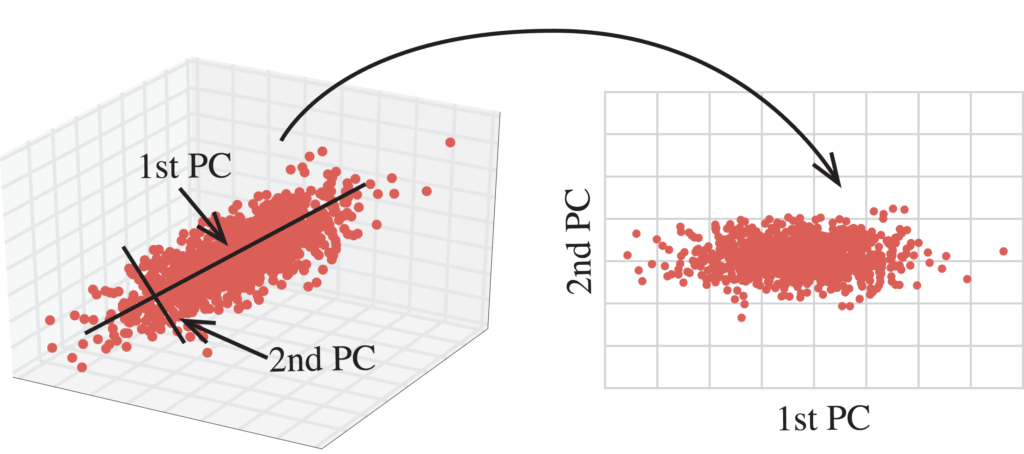

In [13]:
display(Image(url_images+'pca.png'))

PCA reduces the dimension of a dataset
  - It reduces the number of columns by combining them
  - It preserves as much _variability_ (i.e. statistical information) as possible.

It converts 
- a set of possibly correlated predictors 
- into a set of linearly uncorrelated variables

It uses: [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of the data to project it to a lower dimensional space. 

<!-- PCA is based on two basic considerations: 
* high correlation between variables indicates redundancy in the data; 
* the most important variables express higher variance. 

Based on these considerations, the model simplifies the complexity of the variables; -->

PCA tries to explain the covariance structure of the data by means of a (hopefully small) number of components 
- `(PC1, PC2,..,PCn)=PCA(X1,X2,...,Xn)`.
- These components 
  - are linear combinations of the original variables, 
  - often allow for an interpretation and a better understanding of the different sources of variation. 

<!-- ![](img/pca.png)  -->

In [ ]:
print('https://www.youtube.com/watch?v=g-Hb26agBFg')
from IPython.display import HTML
# Very Nive Principal component analysis (PCA)  youtube video by Serrano.Academy
HTML('<iframe width="800" height="550" src="https://www.youtube.com/embed/g-Hb26agBFg?mute=1&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Before applying PCA we __scale our data__ such that each feature has unit variance. 
- __This is necessary because fitting algorithms highly depend on the scaling of the features__
- I told you that many algorithms would suffer without scaling! :D


In [17]:
from sklearn.preprocessing import StandardScaler #for Scaling the features

scaler = StandardScaler() # scaling data before PCA
scaled_features =scaler.fit_transform(df_X.values)
# save the results into a new dataframe
df_X_scaled = pd.DataFrame(scaled_features, index=df_X.index, columns=df_X.columns)
df_X_scaled

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-2.063841,1.047784,1.607158,3.457953,2.843937,2.600666,2.302948,2.464601,-0.563364,3.296223,...,0.766978,1.334295,1.257532,-1.364384,1.335271,2.796316,2.261630,2.335455,2.988855,2.143890
1,-0.346617,2.018864,-0.821099,-0.473495,0.017057,0.579227,0.022494,-0.891192,-0.888200,1.021069,...,0.329837,-0.841171,-0.041644,-0.369166,-0.376614,-0.426094,-0.119748,1.113659,-0.242955,0.340899
2,0.462035,1.651348,0.972320,1.132202,1.482208,2.096160,0.988024,-0.385691,-0.787755,1.593299,...,1.600554,0.319347,0.465625,-0.022149,0.541741,1.174347,0.937517,1.990767,1.263827,0.254008
3,-1.143651,1.932214,0.301411,0.596706,1.490164,1.476039,0.011224,-0.562312,-0.798368,1.605059,...,1.294378,-0.346502,0.731222,-1.472418,0.229678,-0.302310,0.682315,0.752044,-0.916903,-0.397676
4,-0.827626,-0.517597,2.285281,1.331778,0.957141,0.860910,1.055649,2.071772,-0.591981,-0.323888,...,-0.029433,0.204778,0.715110,-0.313512,2.088679,1.849775,1.368423,0.930543,1.913331,2.475766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.726938,2.476019,1.073317,0.262762,2.098765,2.385200,-0.300601,-0.958186,0.101281,3.448244,...,2.301395,-1.211836,0.303533,0.120259,0.390168,-0.259928,0.736495,1.661467,-1.447681,-0.737396
553,2.088634,1.824648,0.121059,0.015763,0.774163,1.308133,-0.202921,-1.095219,2.388781,1.737002,...,0.928030,-0.155104,-0.546473,2.059952,-0.697593,-0.388421,0.284828,0.756661,-0.553739,-1.025826
554,2.049131,0.620807,-0.834806,-0.005973,0.091442,0.128588,-0.811543,-0.920121,-0.241749,0.288786,...,0.713884,-0.936870,0.134118,1.383924,-0.817960,0.400027,0.380022,0.433515,-1.171816,-0.311992
555,2.339595,1.836600,1.563874,3.446097,3.524139,2.729420,2.220296,1.162785,0.743752,1.369283,...,0.903252,0.419089,1.253626,2.251466,1.460096,4.158608,3.410038,2.329300,2.091421,2.451630


As you might imagine, scikit-learn offers [*sklearn.decomposition.PCA*](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html):
- A function for linear dimensionality reduction via PCA
- Uses Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [18]:
from sklearn.decomposition import PCA # Principal Component Analysis module

pca2d = PCA(n_components=2)

pc = pca2d.fit_transform(df_X_scaled.values) # computes PCA components and trasforms original data
pc.shape

(557, 2)

In [19]:
df_X_scaled

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-2.063841,1.047784,1.607158,3.457953,2.843937,2.600666,2.302948,2.464601,-0.563364,3.296223,...,0.766978,1.334295,1.257532,-1.364384,1.335271,2.796316,2.261630,2.335455,2.988855,2.143890
1,-0.346617,2.018864,-0.821099,-0.473495,0.017057,0.579227,0.022494,-0.891192,-0.888200,1.021069,...,0.329837,-0.841171,-0.041644,-0.369166,-0.376614,-0.426094,-0.119748,1.113659,-0.242955,0.340899
2,0.462035,1.651348,0.972320,1.132202,1.482208,2.096160,0.988024,-0.385691,-0.787755,1.593299,...,1.600554,0.319347,0.465625,-0.022149,0.541741,1.174347,0.937517,1.990767,1.263827,0.254008
3,-1.143651,1.932214,0.301411,0.596706,1.490164,1.476039,0.011224,-0.562312,-0.798368,1.605059,...,1.294378,-0.346502,0.731222,-1.472418,0.229678,-0.302310,0.682315,0.752044,-0.916903,-0.397676
4,-0.827626,-0.517597,2.285281,1.331778,0.957141,0.860910,1.055649,2.071772,-0.591981,-0.323888,...,-0.029433,0.204778,0.715110,-0.313512,2.088679,1.849775,1.368423,0.930543,1.913331,2.475766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.726938,2.476019,1.073317,0.262762,2.098765,2.385200,-0.300601,-0.958186,0.101281,3.448244,...,2.301395,-1.211836,0.303533,0.120259,0.390168,-0.259928,0.736495,1.661467,-1.447681,-0.737396
553,2.088634,1.824648,0.121059,0.015763,0.774163,1.308133,-0.202921,-1.095219,2.388781,1.737002,...,0.928030,-0.155104,-0.546473,2.059952,-0.697593,-0.388421,0.284828,0.756661,-0.553739,-1.025826
554,2.049131,0.620807,-0.834806,-0.005973,0.091442,0.128588,-0.811543,-0.920121,-0.241749,0.288786,...,0.713884,-0.936870,0.134118,1.383924,-0.817960,0.400027,0.380022,0.433515,-1.171816,-0.311992
555,2.339595,1.836600,1.563874,3.446097,3.524139,2.729420,2.220296,1.162785,0.743752,1.369283,...,0.903252,0.419089,1.253626,2.251466,1.460096,4.158608,3.410038,2.329300,2.091421,2.451630


We got two _components_ in an array. Let us
- Create a dataframe with them
- Add the target variable!

In [20]:
df_y

,target
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant
...,...
552,malignant
553,malignant
554,malignant
555,malignant


In [21]:
# save results into a dataframe
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2'])
pc_df['target'] = df_y
print(pc_df.target.value_counts())
pc_df.info()

benign       352
malignant    205
Name: target, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     557 non-null    float64
 1   PC2     557 non-null    float64
 2   target  557 non-null    object 
dtypes: float64(2), object(1)
memory usage: 13.2+ KB


In [22]:
#pc_df['target'] = df_y.values # add the target variabile

#print(pc_df.shape)
#pc_df[pc_df.target.isnull()]

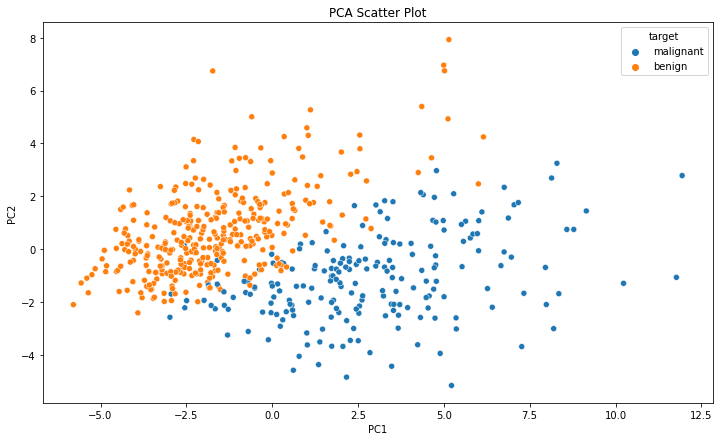

In [23]:
# Now, we can create a visualization of our dataset
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="target" # Grouping data points with different colors
)

plt.title('PCA Scatter Plot')
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  
it can be deduced that the data are linearly separable and therefore a linear model could be a good solution to solve a classification problem. 
</div>

Now the question is:
- **“how many principal components are we going to choose for our new feature subspace?**

A _good_ number of principal components must be considered such that they 
- **take into account a sufficiently high percentage of the total variance** 
  - At least 70%, 
  - For example, after reaching 70%, we could stop after a new component does not lead to substantial increments. 
  - When defining the minimum percentage of acceptable variance, the number of original variables should be taken into account: 
    - as the number of variables increases, a lower percentage of explained variance may be accepted.

**The explained variance tells us how much information (variance) can be attributed to each of the principal components**


In [24]:
pca2d.explained_variance_ratio_

array([0.43730828, 0.14632417])

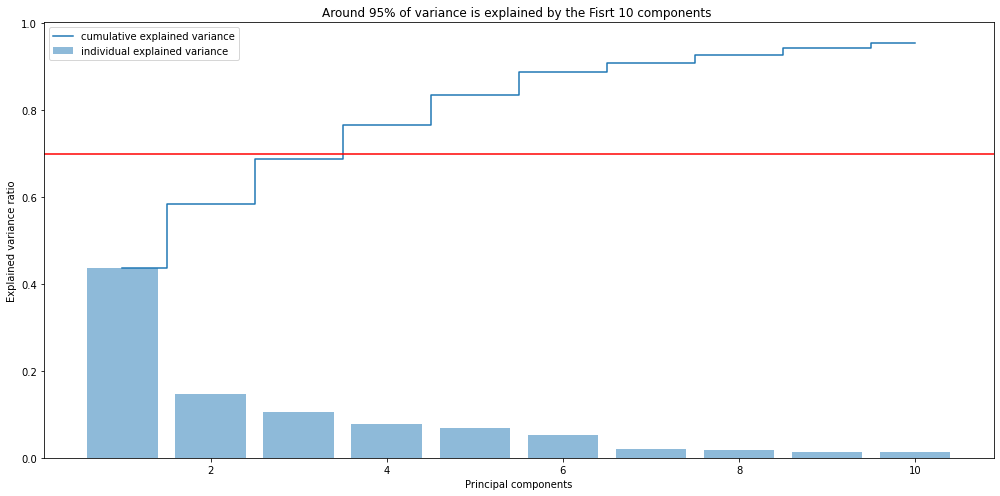

In [25]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
pca10.fit(df_X_scaled.values)

plt.figure(1, figsize=(14, 7))
plt.bar(range(1,11,1), pca10.explained_variance_ratio_, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1,11,1),pca10.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title("Around 95% of variance is explained by the Fisrt 10 components ");
plt.legend(loc='best')
plt.axhline(y=0.7, color='r', linestyle='-') # 70% of  explained variance
plt.tight_layout()

In red: the 70% threshold

We can see that the 10 PC allow to explain bout 95% of the overall variance
- The blu step-line

In particular:
- PC1 describes most of the variability in the data, 
- PC2 adds the next big contribution, 
- and so on. In the end, the last PCs do not bring much more information to describe the data.

Note that
- PC4 allows to reach the 70% threshold
- Visually, after PC4 we can see that 
  - PC5 and PC6 add significant new variance
  - PC7 does not (the steps in the blu line become much less steep
- __Therefore, we could stop at PC6 or PC7.__

Thus, to describe the data we could use only the top m < n (i.e., i;, PC1, ... PCn) components with little - if any - loss of information

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>   A good number of principal component can be 6 because the total explained variance stops increasing substantially or I can choose 3 with the explained variance of 74% is enough (and the rest is noise)  </div>

You can find more dimensionality reduction techniques in the [APPENDIX](#APPENDIX).

## TSNE (T-distributed Stochastic Neighbor Embedding)
* [TSNE](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is a non-linear dimensionality reduction technique that is particularly suited to reducing the complexity of multidimensional datasets in a two- or three-dimensional model. 
* Unlike PCA, it tries to preserve the local data structure by minimizing the difference (KL divergence) between the two high-dimensional spaces and the low-dimensional space

Intuitively:
**It might be preferable to PCA, but it is computationally expensive**

In [26]:
from sklearn.manifold import TSNE

# instance the TSNE for 2 compoments
tsne_2d = TSNE(n_components=2)

# Fit df_X_scaled into an lower space and return that transformed output.
tsne_results = tsne_2d.fit_transform(df_X_scaled.values)

# save results into a dataframe
tsne_df = pd.DataFrame(data = tsne_results , columns = ['C1', 'C2'])
tsne_df['target'] = df_y.values # add the target variabile

print(tsne_df.shape)
tsne_df.head(3)

(557, 3)


,C1,C2,target
0,30.324448,-10.458227,malignant
1,15.483221,1.184090,malignant
2,27.804285,-6.850196,malignant


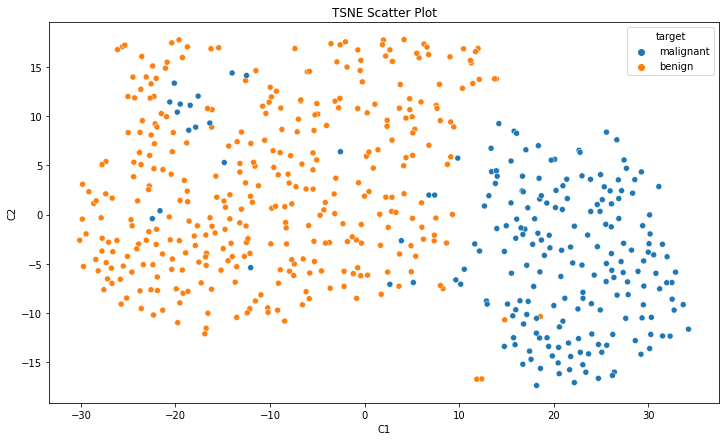

In [27]:
# Now, we can create a visualization of our dataset
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=tsne_df, x="C1", y="C2", hue="target" # Grouping data points with different colors
)

plt.title('TSNE Scatter Plot')
plt.show()

# Clustering

Let us suppose you want to 
- Discover hidden structures in _unlabeled_ data (unsupervised).
  - We don't have the label (benign/malignant - survived/dead)
  
Clustering is a family of techniques to 
- separate data points into a set of groups (clusters) C1, C2 ⋯ , Ck.


Given the desired number of clusters $k$, points are assigned each cluster such that:
* Objects within the same cluster Ci shall be as similar as possible
* Objects from different clusters Ci, Cj (i != j) shall be as dissimilar as possible

Clustering algorithms can be categorized based on their cluster model.

In [28]:
from IPython.display import HTML
# Clustering
HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/cSrKc0A2gv0?end=60" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## K-Means
K-means clustering aims to partition 
- n observations 
- into k clusters, with k given

The clustering is done so to minimize the distances 
- from the _center_ of a cluster (the centroid)
- to each point in the cluster

The centroid of a cluster is, somehow, the mean of its elements

In [29]:
display(Image(url_images+'cluster1.jpg'))
#![image](images/cluster1.jpg)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

**K-Means Algorithm:**
1. Guess some cluster centers
2. Repeat until converged
    - *Find closest centroid*: assign points to the nearest cluster center
    - *Update centroid*: set the cluster centers to the mean

In [ ]:
#<img src='images/1_rwYaxuY-jeiVXH0fyqC_oA.gif'>
display(Image(url_images+'1_rwYaxuY-jeiVXH0fyqC_oA.gif'))

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): The KMeans estimator class in scikit-learn perform  K-Means Clustering.

<!-- 1. Getting  K values as input which is the number of clusters or centroids
2. Selecting random centroids for each cluster
3. Assigning each data point to its closest centroid (Euclidean distance)
4. Adjusting the centroid for the newly formed cluster in step 3
5. Repeating step 3 and 4 till all the data points are perfectly organised within a cluster space -->

In [35]:
from sklearn.cluster import KMeans

X = df_X_scaled.values

 # k-means++ is an algorithm for choosing a good initial centroids (far away from each other). https://en.wikipedia.org/wiki/K-means%2B%2B
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)

kmeans.inertia_

8883.809783694831

In [36]:
help(kmeans)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several 

In [44]:
kmeans.labels_

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
kmeans.cluster_centers_

array([[-0.22964442, -0.39626323, -0.32921256, -0.53554849, -0.56270724,
        -0.54245515, -0.32201076, -0.22585172, -0.058302  , -0.40700381,
        -0.06709682, -0.41435336, -0.41181093, -0.40940941, -0.06279419,
        -0.31087145, -0.25570244, -0.34537948, -0.50953269, -0.53073565,
        -0.53853639, -0.30638723, -0.39805237],
       [ 0.47316844,  0.81647643,  0.67832258,  1.1034653 ,  1.15942426,
         1.11769605,  0.66348372,  0.46535381,  0.12012775,  0.83860676,
         0.13824895,  0.85375006,  0.84851152,  0.84356334,  0.12938364,
         0.64053184,  0.52685942,  0.71163355,  1.04986131,  1.09354874,
         1.10962169,  0.63129238,  0.82016284]])

### The Good Number Of Clusters
Clusters are formed trying to mininze the 
- Within-Cluster-Sum-of-Squares (__WCSS__ or SSE):
  - For each cluster $C$, we compute its centroid $\overline{x}_C$. For each point $x$ in the cluster, we compute its distance from the centroid: $$d(x,\overline{x}_C)$$
  - We sum the power of each distance for all points in $C$ $$\sum_{x\in C}d(x,\overline{x}_C)^2$$
  - We further sum all such values for all clusters
      $$\sum_{i=1}^{K}\sum_{x\in C_i}d(x,\overline{x}_{C_i})^2$$


- We can use the WCSS computed for different number of clusters $K$ 
- to get hints on the _right_ number of clusters to use

The (total) within-cluster sum of square measures the compactness (i.e goodness) of the clustering.
- We want it to be _small_
- We also want it to be _not too small_
    - If you have as many clusters as the points then
      - You have clusters with one point
      - Each centroid is the point itself
      - The WCSS will be zero
      - __But this would be a useless clustering!__
    - We need to find a reasonable trade-off 

In [47]:
#![image.png](images/1_zlZOSJB_DISgUxb06QwISw.png)
display(Image(url_images+'1_zlZOSJB_DISgUxb06QwISw.png'))

zsh:1: unknown file attribute: i


We can find the _good_ value for K using an __Elbow point graph__. 
- We run the K-Means algorithm for a range of K (e.g. from 2 to 5)
- We plot each computed WCSS
- We stop when the WCSS stops decreasing, or its decrements slows down considerably (the elbow point)

In [ ]:
from IPython.display import HTML
# Clustering 
HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/cSrKc0A2gv0?start=62&end=120" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


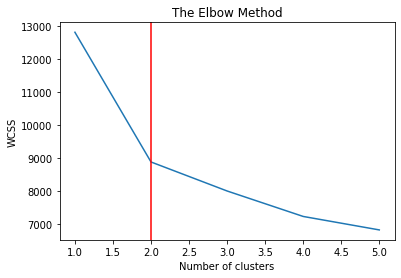

In [52]:
X = df_X_scaled.values 

from sklearn.cluster import KMeans

wcss = []
n_clusters = 5

for i in range(1, n_clusters+1):
    #Compute kmeans for different values of k. For instance, by varying k from 1 to 5 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # k-means++ is an algorithm for choosing a good initial centroids. 
    # For each k, calculate the total within-cluster sum of square (wss)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, n_clusters+1), wcss)#, xticks=range(6)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=2, color='r', linestyle='-')
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>   The “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.
For the above-given graph, the good value for K would be 2 </div>


Once we have decided the $K$ of interest, and we have computed the clustering for it
- We can use its result
- E.g., in these notes, for pedagogical reasons we:
  - add a new feature to our data
  - make a plot to check whether the clustering matches the label

In [56]:
# k-means++ is an algorithm for choosing the initial centroids. New centroid is a far point from the other centroids
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)

pc_df['cluster'] = kmeans.labels_
pc_df

,PC1,PC2,target,cluster
0,8.582837,0.744168,malignant,1
1,-0.032721,-2.407943,malignant,0
2,4.573597,-1.774332,malignant,1
3,2.249629,-0.769603,malignant,1
4,4.399988,2.057585,malignant,1
...,...,...,...,...
552,3.669393,-2.992662,malignant,1
553,1.466327,-3.028465,malignant,1
554,0.522751,-2.084349,malignant,0
555,10.233998,-1.295531,malignant,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

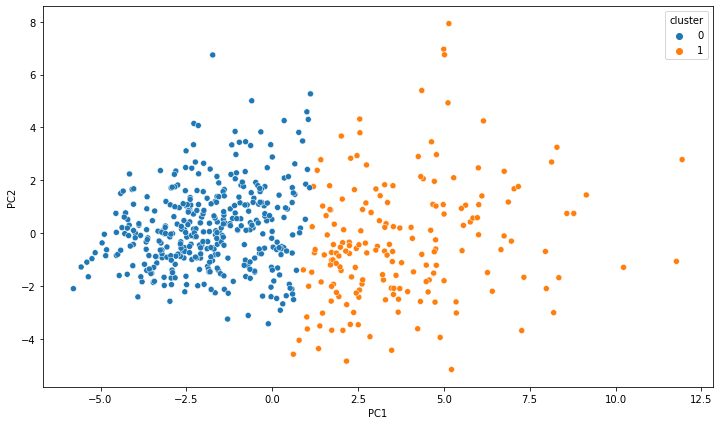

In [59]:
plt.figure(figsize=(12, 7))
# scatter plot to group data points with different colors 
sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="cluster" # Grouping data points with different colors
)

In [64]:
pc_df.groupby('cluster').mean()
pc_df.groupby('target').mean()

,PC1,PC2,cluster
target,,,
benign,-1.645176,0.650441,0.076705
malignant,2.824888,-1.116855,0.756098


Can we compute and plot the centroids!?

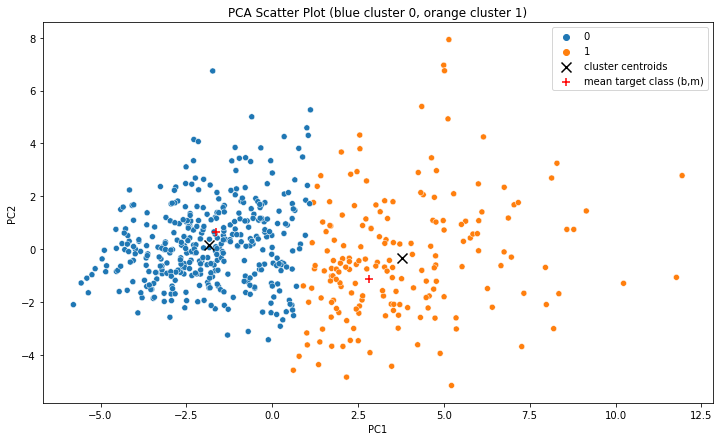

In [70]:
plt.figure(figsize=(12, 7))
# scatter plot to group data points with different colors 
sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="cluster" # Grouping data points with different colors
)

# to plot cluster centroids
df_centroid_pca = pc_df.groupby('cluster').mean()
plt.scatter(df_centroid_pca.iloc[:,0],df_centroid_pca.iloc[:,1], c='black', marker='x',s=100,
            label="cluster centroids")  

# to plot 'target-cluster' centroids
df_mean_pca = pc_df.groupby('target').mean()
plt.scatter(df_mean_pca.iloc[:,0],df_mean_pca.iloc[:,1], c='red',marker='+',s=50,
            label="mean target class (b,m)") 


plt.legend()
plt.title('PCA Scatter Plot (blue cluster 0, orange cluster 1)')
plt.show()

__It is interesting to see how__
- The centroids of the clusters fall very close to the average values of the two classes of tumors (benign and malignant). 
- Therefore, in this dataset, we could have made up our own labeling in case the real one would have not been available
- Sadly, this is not always the case: __real datasets are wolves! :D__

## Hierarchical clustering

In [ ]:
from IPython.display import HTML
# Clustering 
HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/cSrKc0A2gv0?start=123" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) 
- Is a method of cluster analysis which seeks to build a hierarchy of clusters. [wiki](https://en.wikipedia.org/wiki/Hierarchical_clustering)
- We don't have anymore a $K$ number of clusters
- We start from small clusters, and we get them merged hierarchically in larger and larger clusters.
  - We follow a bottom-up apporach
    - We keep merging clusters until all points belong to the same cluster
  - There exist also top-down aproaches which work the other way around
  - We keep track of all hierachies
  -  The user can choose to flatten this to standard clusters.

In [71]:
#<img src='images/hclustering.jpg' />
display(Image(url_images+'hclustering.jpg'))

SyntaxError: invalid syntax (3215379470.py, line 1)

**Base Algorithm** (agglomerative)
1. Form initial clusters consisting of a single object, and compute the distance between each pair of clusters.
2. Merge the two clusters having minimum distance.
3. Calculate the distance between the new cluster and all other clusters.
4. If there is only one cluster containing all objects: Stop, otherwise go to step 2. 

In [ ]:
#<img src='images/hclustering_measures.jpg' width='700' />
display(Image(url_images+'hclustering_measures.jpg'))

In [ ]:
# from src.utils import plot_dendrograms
# plot_dendrograms(X) # Ward dendrom has well separated and compact clusters 


**[linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function from scipy.cluster.hierarchy models performs hierarchical/agglomerative clustering using Ward method.**

*Note: We used the Ward linkage method, it has the highest performance in most situations, except when there are very large differences among cluster sizes (ref. 
[A COMPARISON OF HIERARCHICAL METHODS FOR CLUSTERING FUNCTIONAL DATA](https://people.stat.sc.edu/Hitchcock/compare_hier_fda.pdf)).*


In [72]:
from scipy.cluster.hierarchy import linkage # to perform hierarchical/agglomerative clustering

X = df_X_scaled.values 

# Perform hierarchical/agglomerative clustering using Ward method. 
Z = linkage(X, method='ward') 


Now, we want to plot the hierarchical clustering as a [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

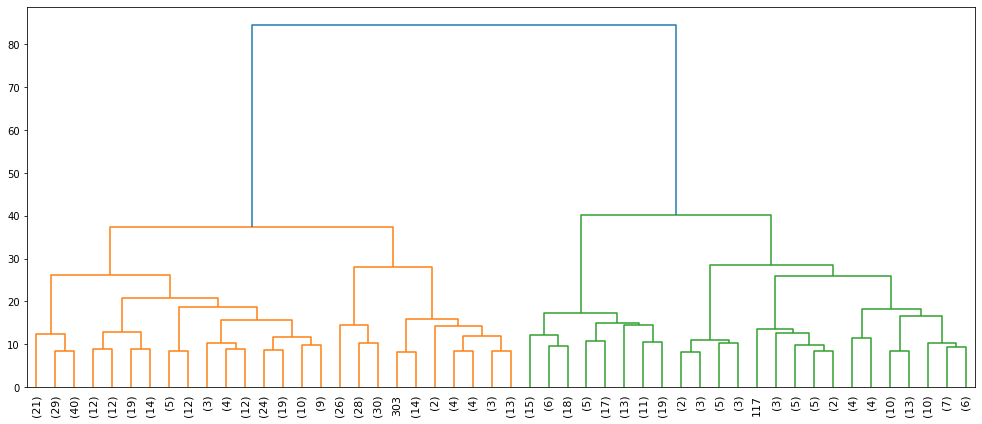

In [73]:
from scipy.cluster.hierarchy import dendrogram #  plot the hierarchical clustering as a dendrogram

# plots dendogram
plt.figure(figsize=(17, 7))

dendrogram(
    Z,                            # The linkage matrix 
    leaf_font_size=11.,           # 
    truncate_mode = 'lastp',      # Truncation is used to condense the dendrogram, show only p clusters
    p=50,                          # number cluster to plot in condensed dendrogram
    color_threshold = 41           # Colors clusters below this cutoff threshold. if None it cuts to 70% of the maximum length) by default
)

plt.show()

* horizontal lines are cluster merges
* vertical lines tell you which clusters/labels were part of merge forming that new cluster
* heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster
* a huge jump in distance is typically what we're interested to find the optimal number of clusters. 

*Note: There are some automated Cut-Off selection methods [but they are not very reliable](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)*





**We have 2 well separated clusters.**
We can form 2 flat clusters from hierarchical clustering using [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html?highlight=fcluster#scipy.cluster.hierarchy.fcluster)

In [74]:
from scipy.cluster.hierarchy import fcluster

#  get 2 flat clusters from the hierarchical clustering defined by the given linkage matrix.
k=2 
clusters = fcluster(Z, k, criterion='maxclust')

clusters[:30] 

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2], dtype=int32)

In [75]:
# we add the column with the clusters found to the dataframe that contains the 2 principal components
pc_df['hcluster'] = clusters
pc_df

,PC1,PC2,target,cluster,hcluster
0,8.582837,0.744168,malignant,1,2
1,-0.032721,-2.407943,malignant,0,2
2,4.573597,-1.774332,malignant,1,2
3,2.249629,-0.769603,malignant,1,2
4,4.399988,2.057585,malignant,1,2
...,...,...,...,...,...
552,3.669393,-2.992662,malignant,1,2
553,1.466327,-3.028465,malignant,1,2
554,0.522751,-2.084349,malignant,0,1
555,10.233998,-1.295531,malignant,1,2


Comparison between real centroids and hierarchical clustering centroids
- *exactly as we did for the Kmeans*

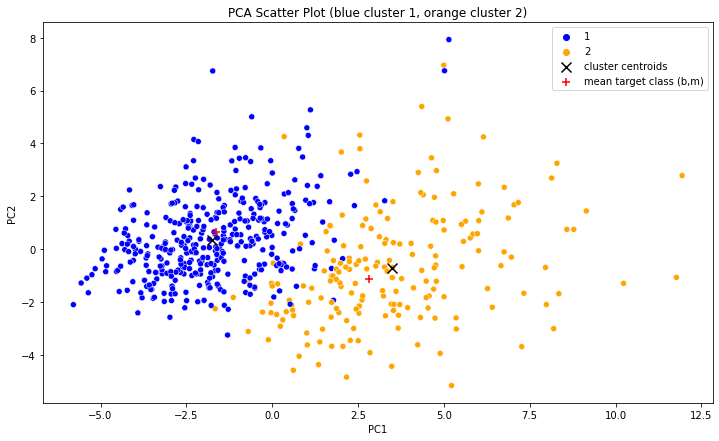

In [76]:
# scatter plot to group data points with different colors 
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="hcluster", palette=['blue','orange'] # Grouping data points with different colors
)

# to plot cluster centroids
df_centroid_pca = pc_df.groupby('hcluster').mean()
plt.scatter(df_centroid_pca.iloc[:,0],df_centroid_pca.iloc[:,1], c='black', marker='x',s=100,
            label="cluster centroids")  

# to plot mean for Benign and Malignant 
df_mean_pca = pc_df.groupby('target').mean()
plt.scatter(df_mean_pca.iloc[:,0],df_mean_pca.iloc[:,1], c='red',marker='+',s=50,
            label="mean target class (b,m)") 


plt.legend()
plt.title('PCA Scatter Plot (blue cluster 1, orange cluster 2)')
plt.show()

# APPENDIX

This appendix includes further information on the course topics but **will not be exam topics**.

## Dimensionality Reduction 
### Feature Selection using Scikit Learn
Feature selection works by selecting the best features based on univariate statistical tests. 
- The most _important features_, the _most informative_ ones
- It can be seen as a preprocessing step to an estimator. 

The function [SelectKBest()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) 
- removes all but the k highest scoring features
- i.e., keeps the k highest scoring featuers

[The Chi-square (χ2) test](https://en.wikipedia.org/wiki/Chi-squared_test) is used to examine whether observed data fits with expected data.
- It is a test of independence and it is used to determine if there is a significant relationship between two variables. 
- **Recall that the chi-square test measures dependence between stochastic variables**, so using this function _weeds out_ the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [77]:
from sklearn.feature_selection import SelectKBest,chi2
def selector(X, y, k=12):
    
    """The function receive features and labels (X, y) and a target number to select features (k)
    base on the chi-square (χ2) and return a new dataframe wiht k best features"""
    
    selector =SelectKBest(chi2, k=k)
    best_X = selector.fit_transform(X, y)
    
    return pd.DataFrame(best_X, columns=X.columns[selector.get_support()])

best_X = selector(df_X, df_y, 5)

best_X.head()

,mean texture,mean area,area error,worst texture,worst concavity
0,10.38,1001.0,153.40,17.33,0.7119
1,17.77,1326.0,74.08,23.41,0.2416
2,21.25,1203.0,94.03,25.53,0.4504
3,14.34,1297.0,94.44,16.67,0.4000
4,15.70,477.1,27.19,23.75,0.5355


### PCA
PCA is introduced in a great way in the youtube video provided above (and below)!
- Here we provide some notes for completeness, but we suggest to look at the video

PCA is a statistical procedure that (orthogonally) transforms the original n coordinates of a data set into a new set of n coordinates,
called principal components.

`(PC1, PC2,..,PCn)=PCA(X1,X2,...,Xn)`

The first principal component PC1 follows the direction (eigenvector) of the largest possible variance (largest eigenvalue of the covariance matrix) in the data.

Each following component PCk follows the direction of the next largest possible variance under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components

In a nutshell, the principal components  are eigenvectors of the data's covariance matrix. Thus, the principal components are often computed by eigendecomposition of the data covariance matrix or singular value decomposition of the data matrix. 

In [ ]:
#![](images/pca_2.jpg)
display(Image(url_images+'pca_2.jpg'))

In [ ]:
from IPython.display import HTML
# Extract from Principal component analysis (PCA)  youtube video by Serrano.Academy
HTML('<iframe width="1200" height="700" src="https://www.youtube.com/embed/g-Hb26agBFg?start=1252&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#### 3D PCA

In [86]:
#df_y.target.values

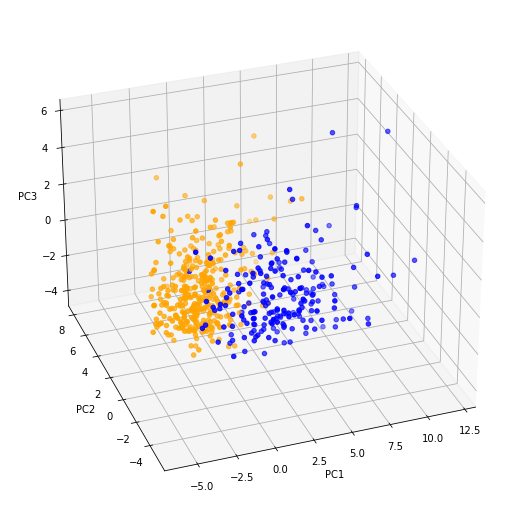

In [87]:
#3D scatter plot
pca3d = PCA(n_components=3)
pc3 = pca3d.fit_transform(df_X_scaled.values)

from mpl_toolkits.mplot3d import Axes3D # 3D scatter plot
fig = plt.figure(figsize=(12,7))
ax = Axes3D(fig) 

cmap = {'benign':'orange','malignant':'blue'}

ax.scatter(pc3[:,0], pc3[:,1], pc3[:,2], c=[cmap[c] for c in  df_y.target.values],
           marker='o', s=20)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(30,-110)
plt.show()

#### Visualize Loadings
It is also possible to visualize loadings using shapes, and use annotations to indicate which feature a certain loading original belong to. 

* PCA loading plot which shows how strongly each characteristic influences a principal component.

For more details about the linear algebra behind eigenvectors and loadings, see this [Q&A thread](https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another).

In [ ]:
from src.utils import biplot_pca
biplot_pca( pc_df, pca2d, df_X_scaled.columns.values)

Continuing the exploratory process aimed at understanding how to simplify the dataset, without losing relevant information, the following processes were applied:  UMAP and TSNE , which are techniques for reducing complexity; in particular:
### TSNE and UMAP
* [TSNE (T-distributed Stochastic Neighbor Embedding)](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is a non-linear dimensionality reduction technique that is particularly suited to reducing the complexity of multidimensional datasets in a two- or three-dimensional model. **It is somehow better than PCA, but it is computationally expensive and less intepretable**


In [ ]:
from IPython.display import HTML
# see StatQuest: t-SNE, Clearly Explained video from youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NEaUSP4YerM?mute=1&start=120&end=250&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

* [UMAP (Uniform Manifold Approximation and Projection)](https://arxiv.org/abs/1802.03426) is a dimension reduction technique that can be used for visualisation **similarly to t-SNE, but with superior run time performance.**

In [ ]:
from IPython.display import HTML
# see AICoffeeBreak UMAP explained | The best dimensionality reduction?
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/6BPl81wGGP8?mute=1&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')



By reducing the dimension in a way that preserves as much of the structure of the data as possible we can get a visualisable representation of the data allowing us to “see” the data and its structure and begin to get some intuition about the data itself.

In [ ]:
#  umap-learn for umap dimension reduction
%pip install pip -U
%pip install umap-learn

In [ ]:
from umap import UMAP
from sklearn.manifold import TSNE
import time 
X = df_X_scaled.values
y = df_y.values 

print(f"[{time.asctime(time.localtime())}] Starting")
# Invoke the TSNE method
tsne_results = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=2000).fit_transform(X)
print(f"[{time.asctime(time.localtime())}] Completed TSNE")
# Invoke the UMAP method
reducer = UMAP().fit_transform(X) 
print(f"[{time.asctime(time.localtime())}] Completed UMAP")
# Invoke the PCA method
pc = PCA(n_components=2).fit_transform(X)
print(f"[{time.asctime(time.localtime())}] Completed PCA")

# Plot the TSNE and PCA visuals side-by-side
cmap = {'benign':'orange','malignant':'blue'}
fig = plt.figure(figsize = (15,9))

plt.subplot(2, 2, 1)
plt.title('TSNE Scatter Plot')
plt.scatter(tsne_results[:,0], tsne_results[:,1],  c =[cmap[x] for x in y] , alpha=0.75)

plt.subplot(2, 2, 2)
plt.title('UMAP Plot')
plt.scatter( reducer[:,0], reducer[:,1], c =[cmap[x] for x in y] ,alpha=0.75)
      
plt.subplot(2, 2, 3)
plt.title('PCA Plot')
plt.scatter( pc[:,0], pc[:,1], c =[cmap[x] for x in y] ,alpha=0.75)


plt.show()

## Clustering
Module [sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html) contains several Clustering models 
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)
<!--  The next section introduces hierarchical clustering, but before we will introduce a well-known clustering quality measure. -->

Clustering techniques can be divided into two approaches: 
- partitional (like Kmeans) and hierarchical.

We suggest [Amit Saxena et al., A review of clustering techniques and developments, 2017](https://doi.org/10.1016/j.neucom.2017.06.053) paper for comprehensive study on clustering



### Silhouette: Clustering quality measure
Silhouette-Coefficient measures the quality of clustering
* a(x): distance of object x to its cluster representative
* b(x): distance of object x to the representative of the second-best cluster
* Silhouette s(x) of x
![image.png](images/silhouette.png)

Computes silhouette coefficients for each point, and **average it out for all the samples to get the silhouette score**.

**The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).**
The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Note:
- If most objects have a high value, then the clustering configuration is appropriate. 
- If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [88]:
from sklearn.metrics import silhouette_samples, silhouette_score
# The silhouette_score gives the average value for all the samples.
silhouette_score(X,  kmeans.labels_)

0.3151180959299782

For n_clusters =2  The average silhouette_score is : 0.32


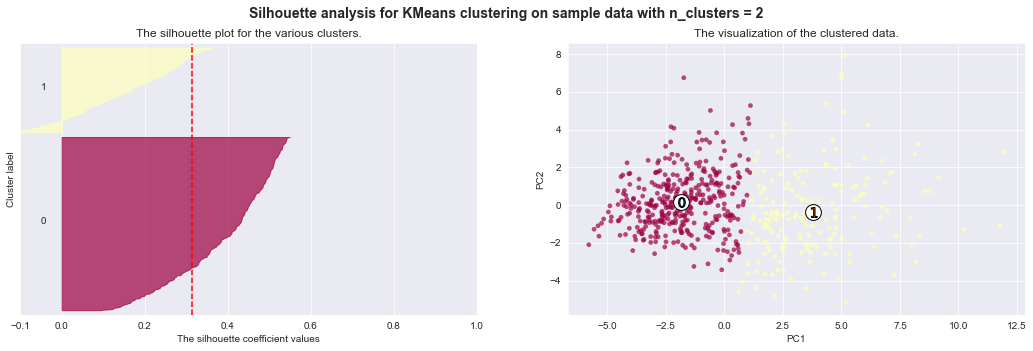

For n_clusters =3  The average silhouette_score is : 0.23


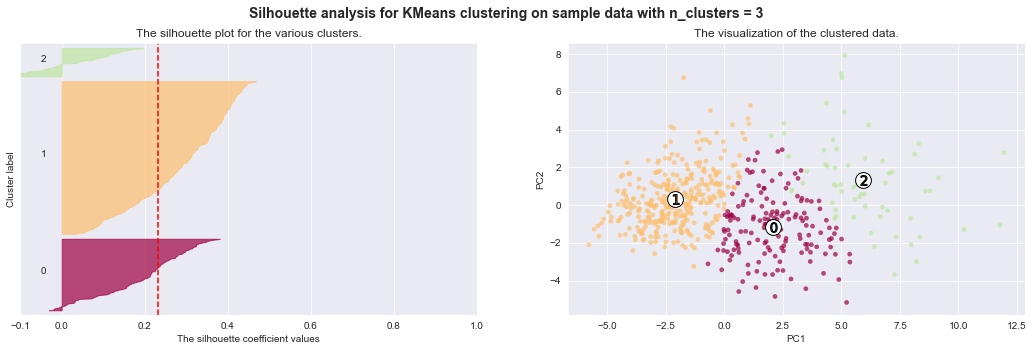

For n_clusters =4  The average silhouette_score is : 0.17


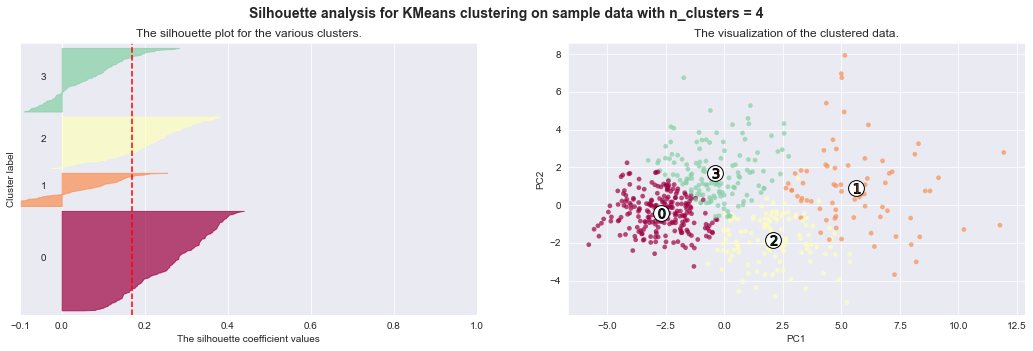

For n_clusters =5  The average silhouette_score is : 0.14


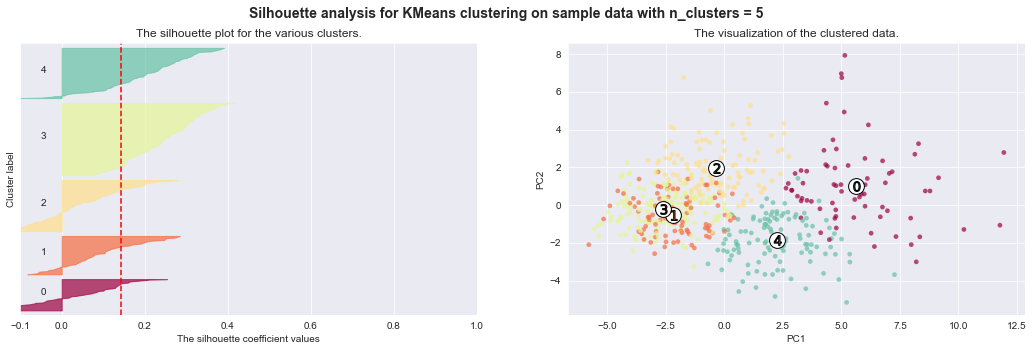

In [90]:
from pdai_utils import kmeeans_silhouette_analysis
sns.set_style('darkgrid') 
kmeeans_silhouette_analysis(X, range(2, n_clusters+1))

The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

    
* In our example, the analysis of the silhouette is used to choose an optimal value for the number of clusters. The silhouette plot shows that a n_clusters value of 5 and 6 is not good because they have the silhouette score lower than average scores, many negative values and also large fluctuations in the size of the silhouette plot. **From the analysis of the silhouette, a good number of k clusters appears to be 2 since it confirms what has already been expressed by the elbow method.**

* Both Elbow method / SSE Plot and Silhouette method can be used interchangeably based on the details presented by the plots. It may be good idea to use both the plots just to make sure that you select most optimal number of clusters.

</div>

In [ ]:
silhouette_score(X,  clusters)